### PROYECTO FINAL: Aplicación de Machine Learning

#### 1. Selección de dataset

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
dataframe = pd.read_excel('Dataset.xlsx')
dataframe.head()

Id FechaDesembolso  FlagMalo  RegionAgencia  NumInst_Total  \
0  2021007      2021-12-31         0              3              0   
1  1714432      2021-12-31         0              4              1   
2   258670      2021-12-31         0              4              0   
3  1073222      2021-12-31         0              4              2   
4  1034029      2021-12-31         1              4              0   

   NumOpe_Total  ContBanc_Hist  MaxDeudaMora_U24M  Sal_Acu_U24M  \
0             0             40               0.00        400.02   
1             1             29               0.00     178147.75   
2             0             24               0.00       3961.80   
3             3             60           54799.75    1696673.49   
4             0             21               0.00      58915.39   

   PeorCalif_U6M  ...  DeudaTotalMora_U12M MaxMontoTC_SinBDA  \
0            0.0  ...                 0.00               0.0   
1            0.0  ...                 0.00               0.0   
2            0.0  ...                 0.00               0.0   
3            0.0  ...             52521.58               0.0   
4            0.0  ...                 0.00               0.0   

   SaldoCred_SinBDAeHip  ExclusivoTU            Inst_Max_Cap_3M  \
0                  0.00            1                SUPER FACIL   
1               5897.23            0  BANCO DE DESARROLLO RURAL   
2                  0.00            1                          0   
3              76190.51            0  BANCO DE LOS TRABAJADORES   
4                  0.00            0  BANCO AZTECA DE GUATEMALA   

  ContBanc_Hist_Total  Antig_Bancarizado  PeorCalif_Hist  \
0                  40                  1             0.0   
1                  29                 20             0.0   
2                  24                  1             0.0   
3                  99                 99             2.0   
4                  55                 55             0.0   

         Inst_Max_End_Mayor0  ContBanc_3Mconsaldo  
0                        NaN                    1  
1  BANCO DE DESARROLLO RURAL                    3  
2                        NaN                    0  
3  BANCO DE LOS TRABAJADORES                    3  
4                        NaN                    2  

[5 rows x 28 columns]

#### 2. Análisis exploratorio

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    8192 non-null   int64         
 1   FechaDesembolso       8192 non-null   datetime64[ns]
 2   FlagMalo              8192 non-null   int64         
 3   RegionAgencia         8192 non-null   int64         
 4   NumInst_Total         8192 non-null   int64         
 5   NumOpe_Total          8192 non-null   int64         
 6   ContBanc_Hist         8192 non-null   int64         
 7   MaxDeudaMora_U24M     8192 non-null   float64       
 8   Sal_Acu_U24M          8192 non-null   float64       
 9   PeorCalif_U6M         7238 non-null   float64       
 10  PeorCalif_U36M        7702 non-null   float64       
 11  Inst_Max_Cap          6489 non-null   object        
 12  MaxDeuda_U7_18M       8192 non-null   float64       
 13  Prom_Saldo_U18M   

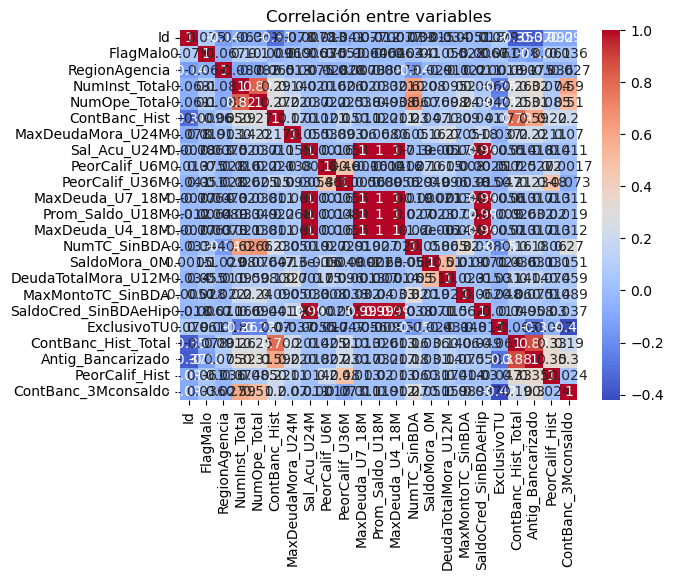

c:\Users\PC2\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


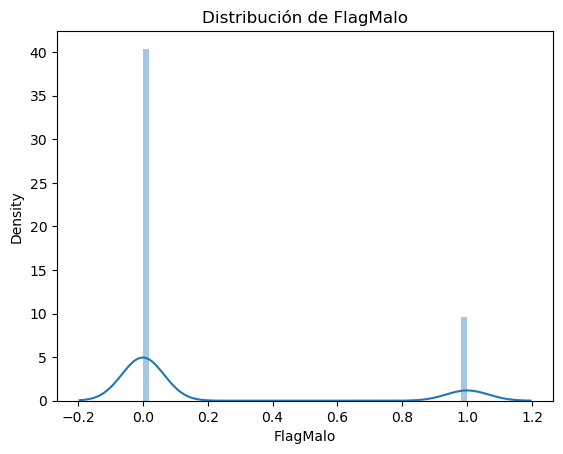

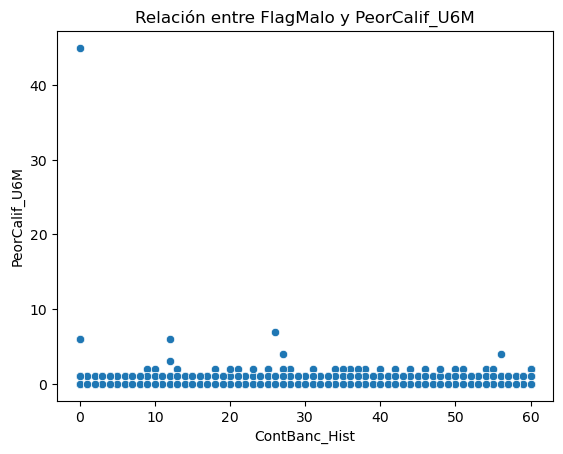

In [6]:


# Obtener información general del dataset
print(dataframe.info())

# Estadísticas descriptivas
print(dataframe.describe())

# Verificar valores nulos o faltantes
print(dataframe.isnull().sum())

# Gráfico de correlación
correlation = dataframe.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlación entre variables')
plt.show()

# Gráfico de distribución
sns.distplot(dataframe['FlagMalo'])
plt.title('Distribución de FlagMalo')
plt.show()

# Gráfico de dispersión
sns.scatterplot(x='ContBanc_Hist', y='PeorCalif_U6M', data=dataframe)
plt.title('Relación entre FlagMalo y PeorCalif_U6M')
plt.show()

 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8192 entries, 0 to 8191
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Id                    8192 non-null   int64         
 1   FechaDesembolso       8192 non-null   datetime64[ns]
 2   FlagMalo              8192 non-null   int64         
 3   RegionAgencia         8192 non-null   int64         
 4   NumInst_Total         8192 non-null   int64         
 5   NumOpe_Total          8192 non-null   int64         
 6   ContBanc_Hist         8192 non-null   int64         
 7   MaxDeudaMora_U24M     8192 non-null   float64       
 8   Sal_Acu_U24M          8192 non-null   float64       
 9   PeorCalif_U6M         7238 non-null   float64       
 10  PeorCalif_U36M        7702 non-null   float64       
 11  Inst_Max_Cap          6489 non-null   object        
 12  MaxDeuda_U7_18M       8192 non-null   float64       
 13  Prom_Saldo_U18M   

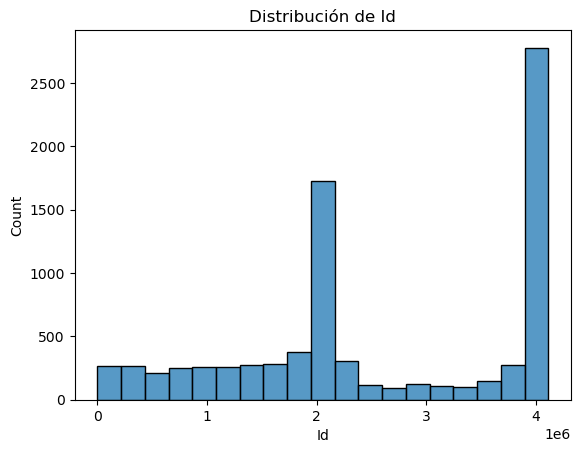

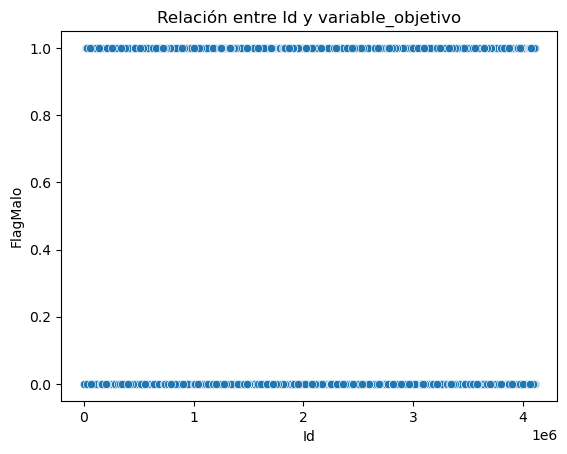

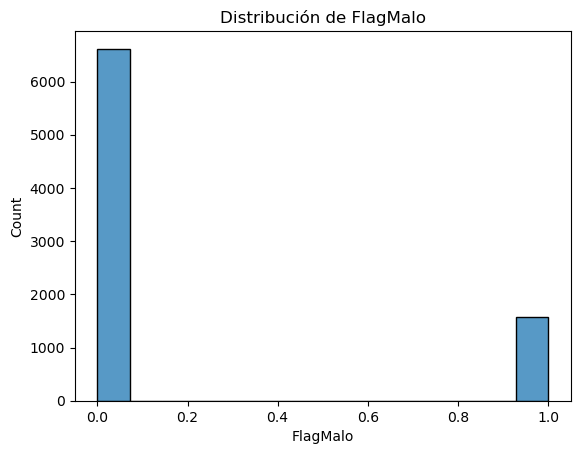

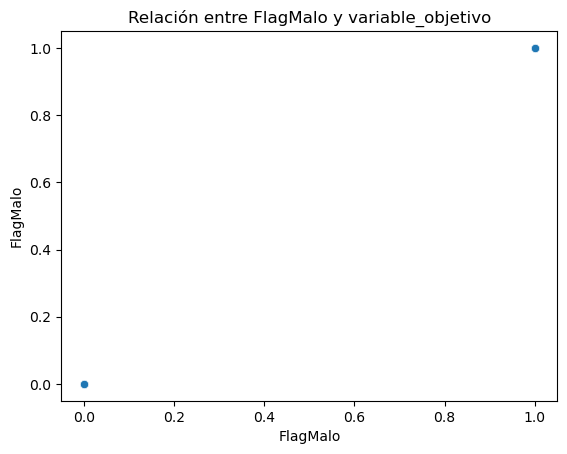

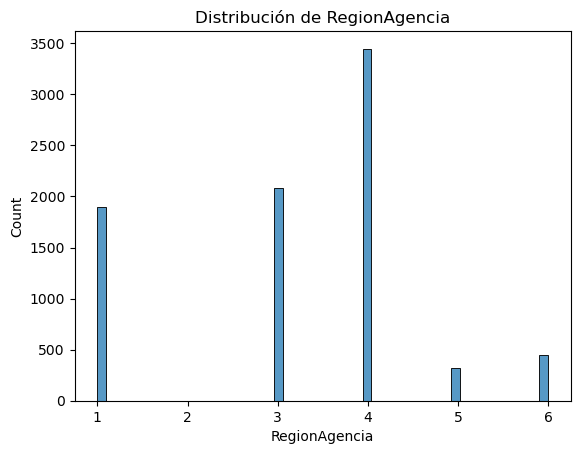

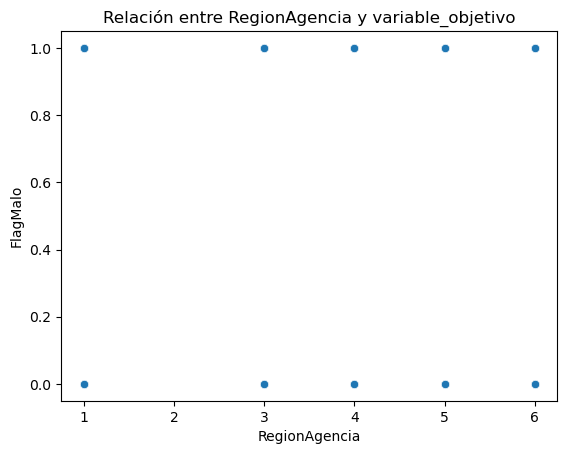

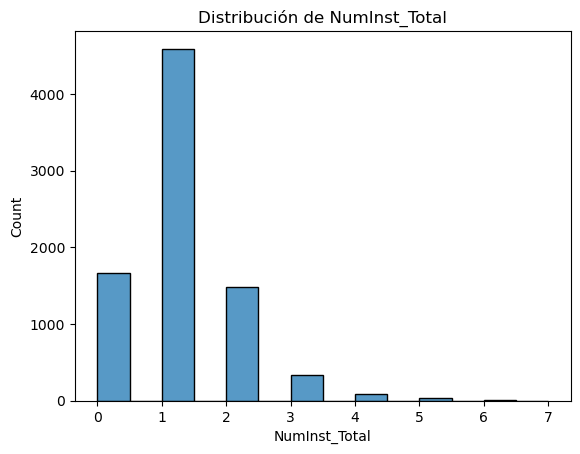

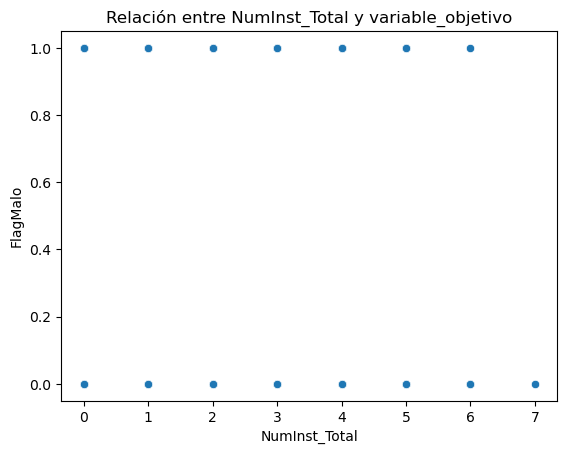

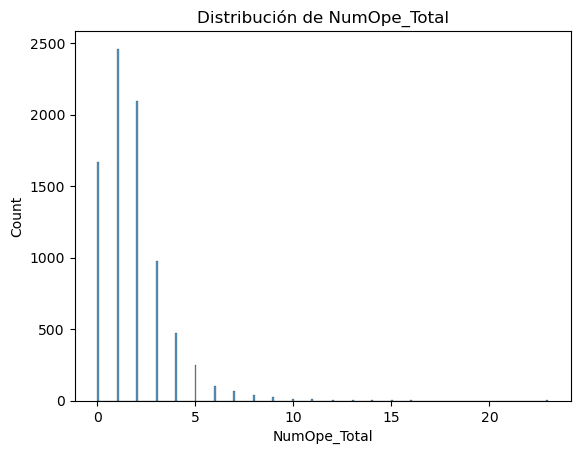

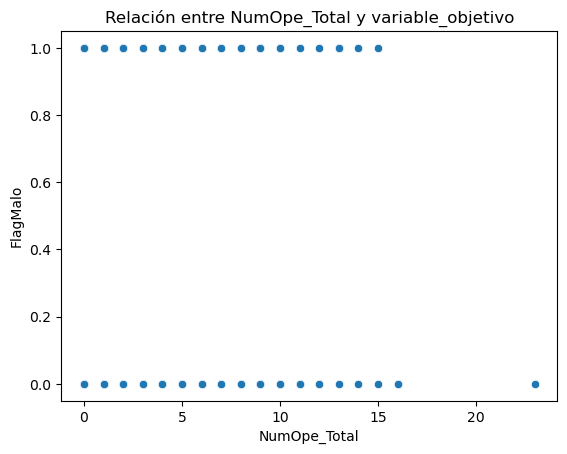

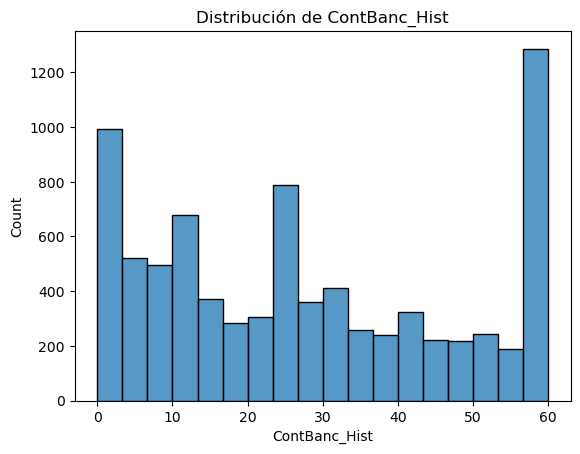

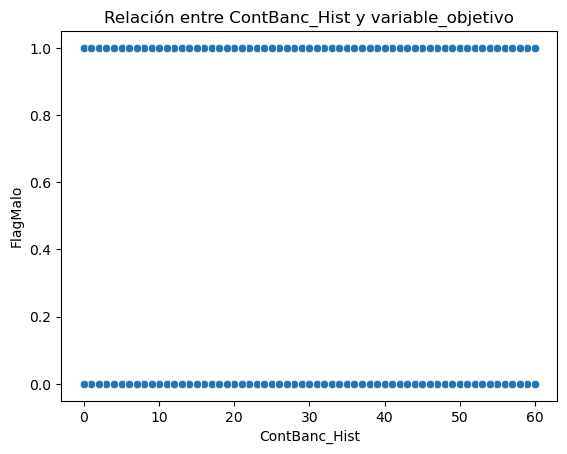

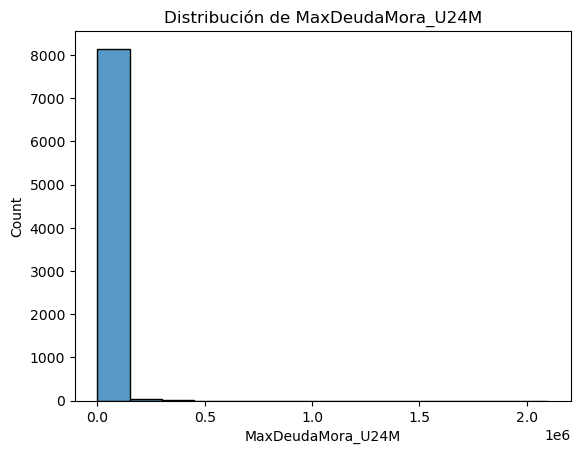

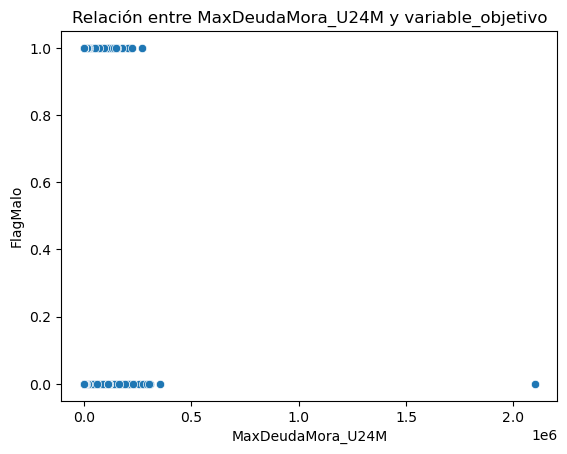

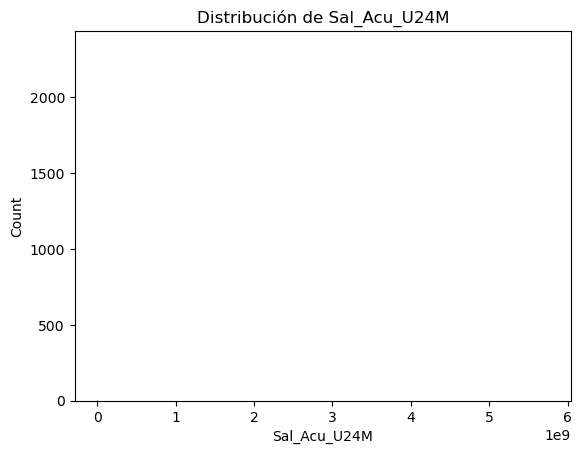

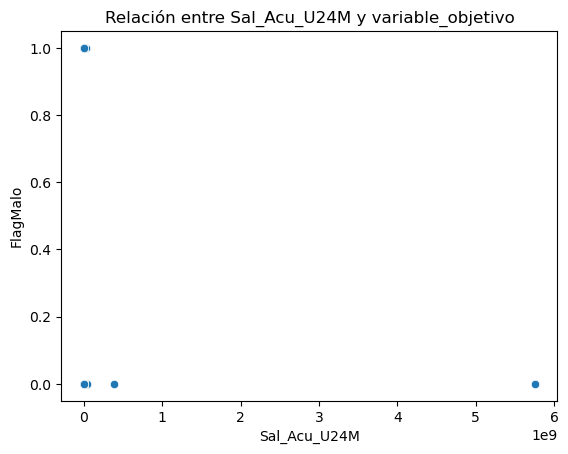

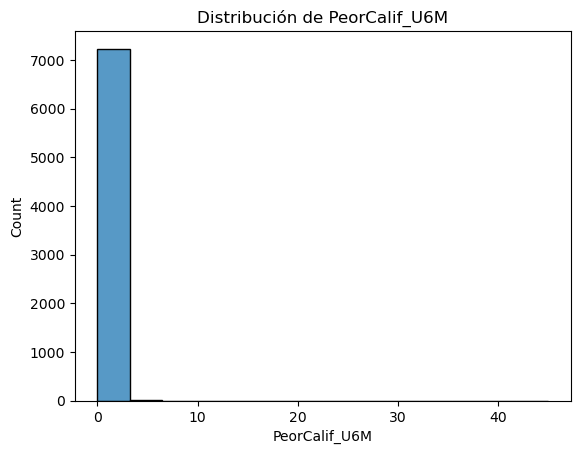

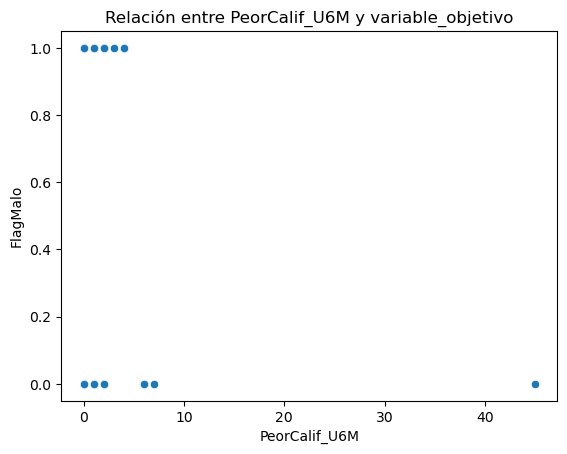

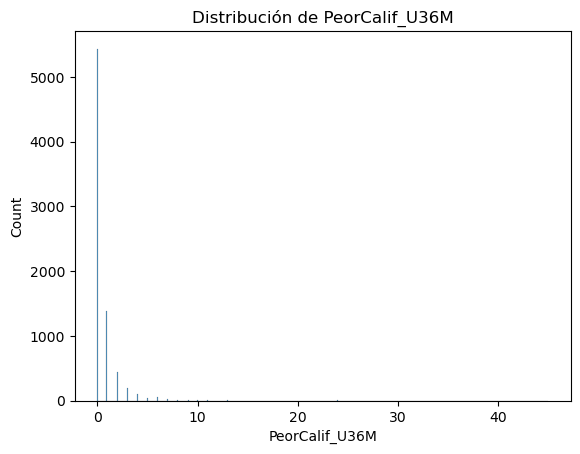

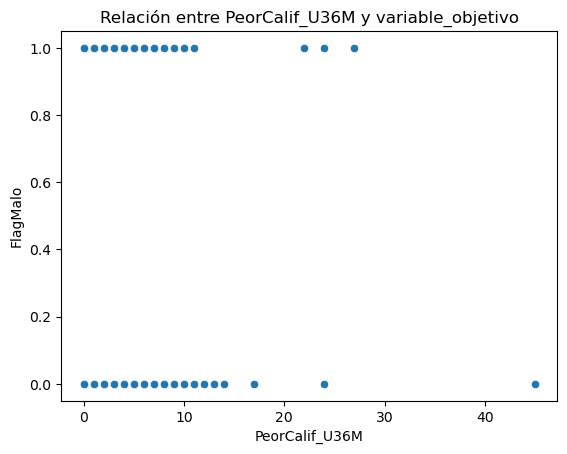

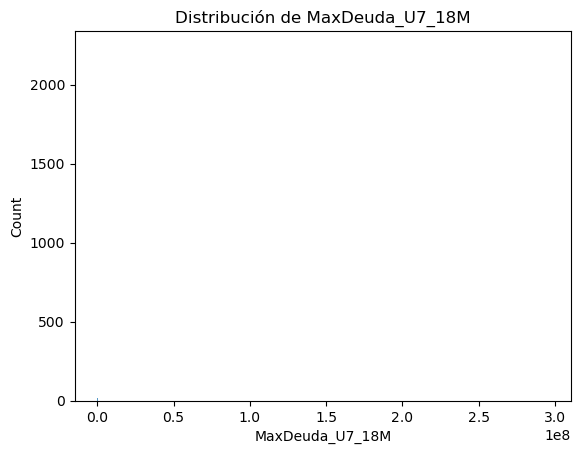

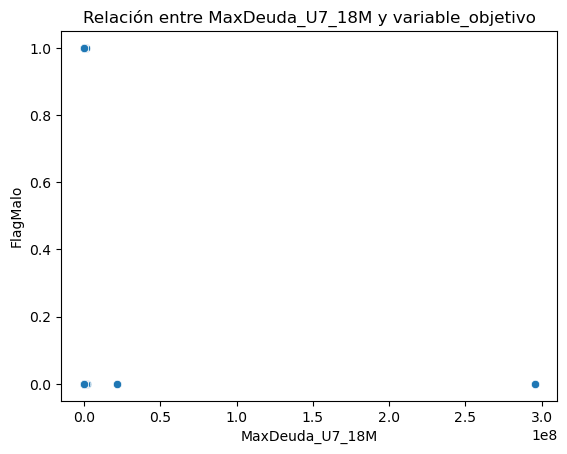

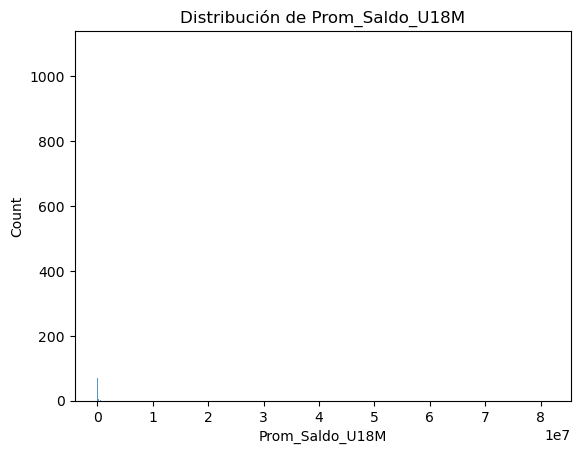

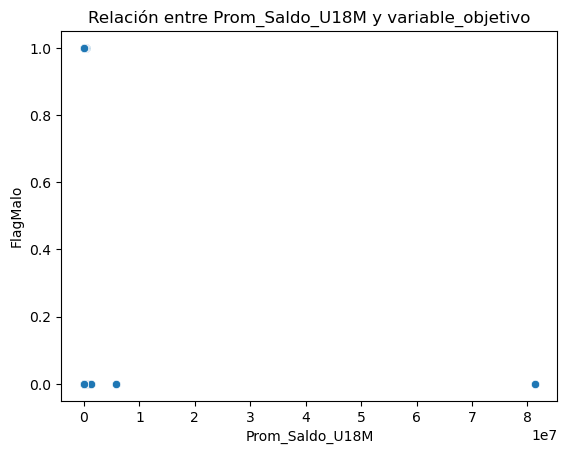

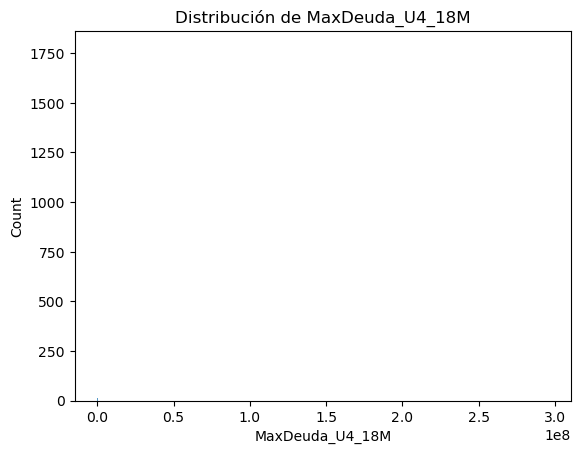

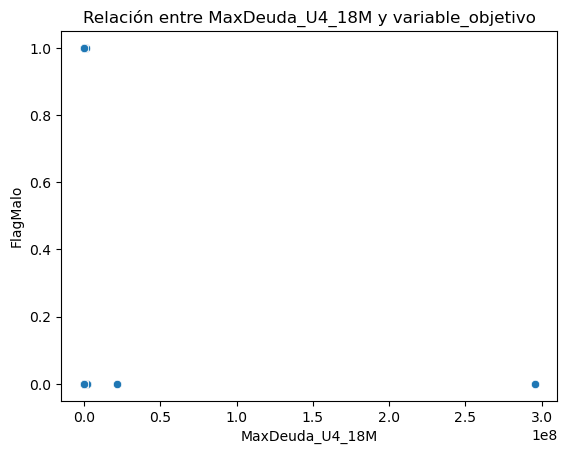

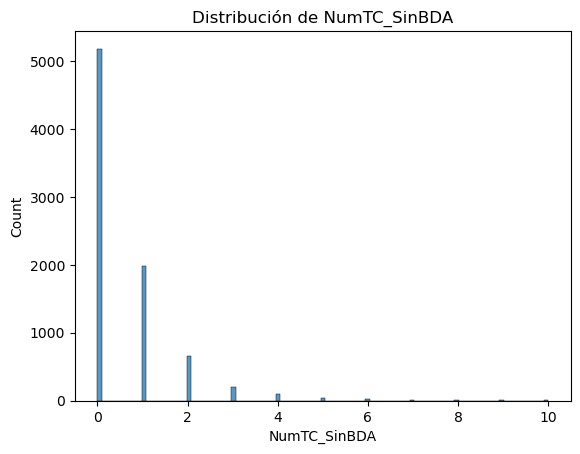

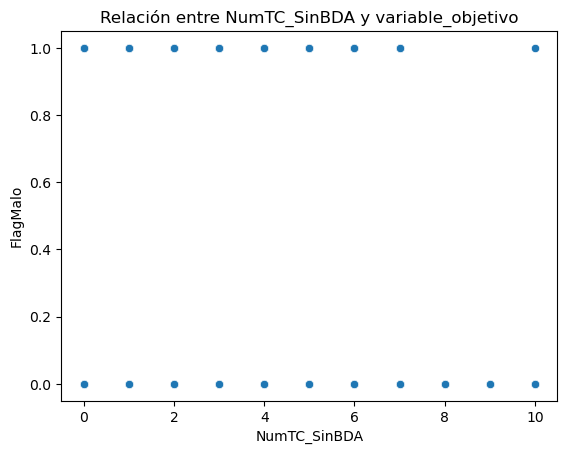

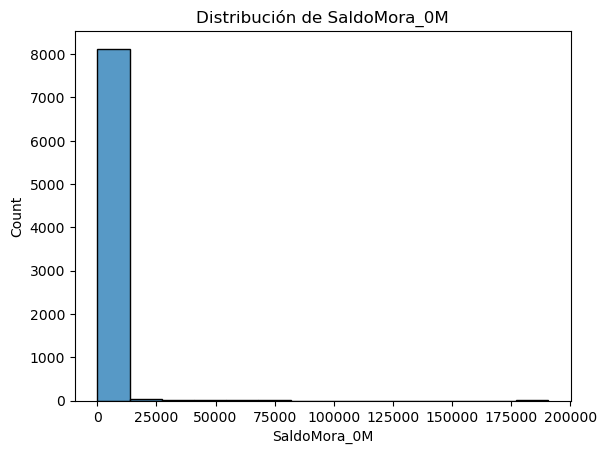

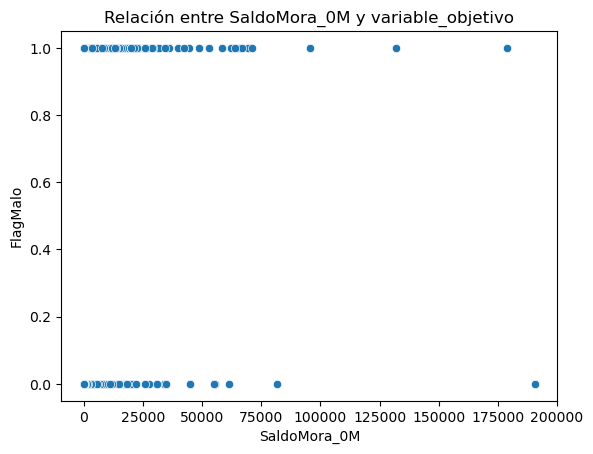

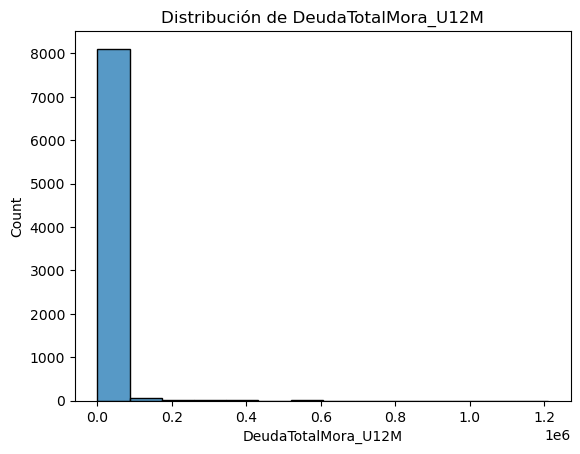

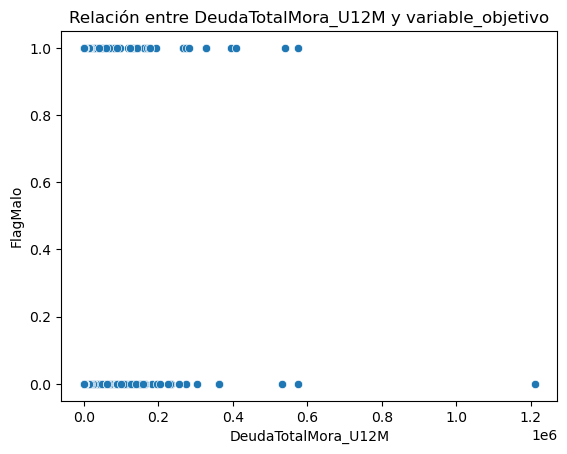

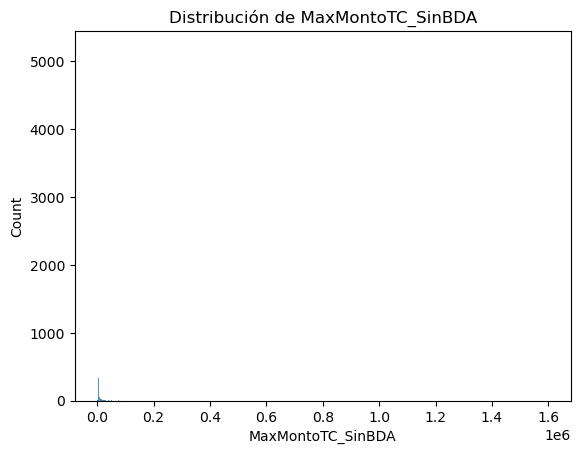

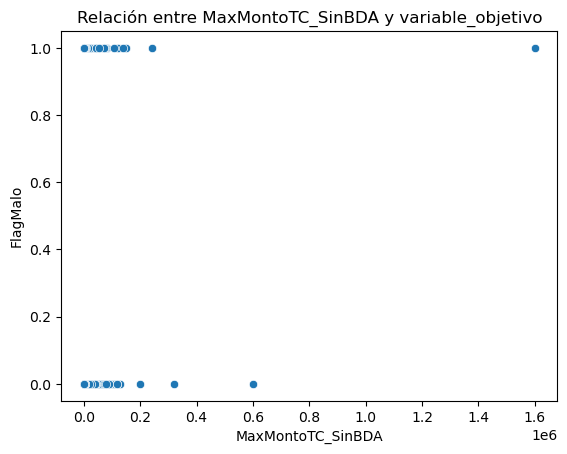

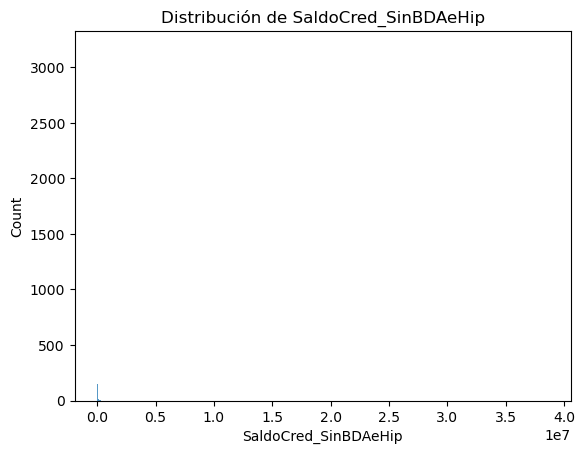

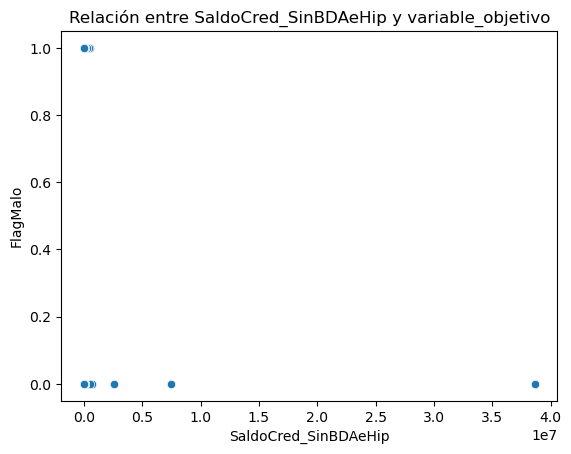

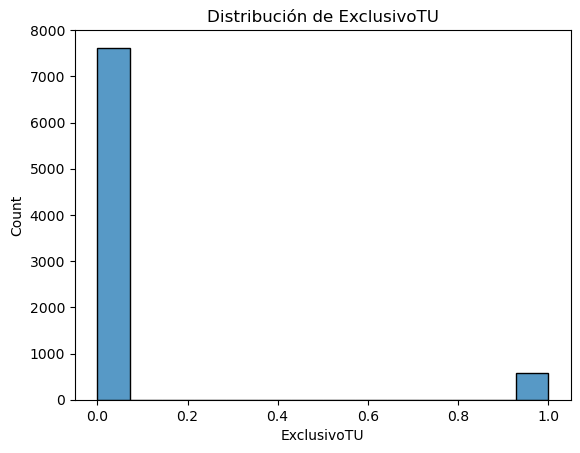

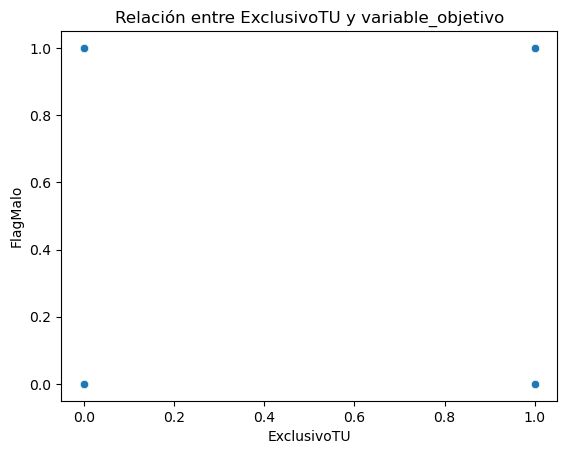

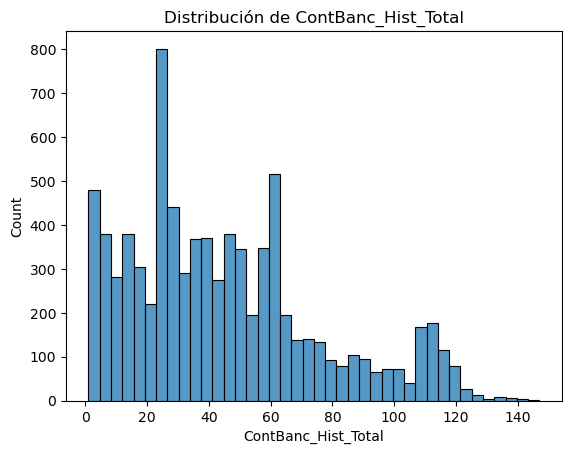

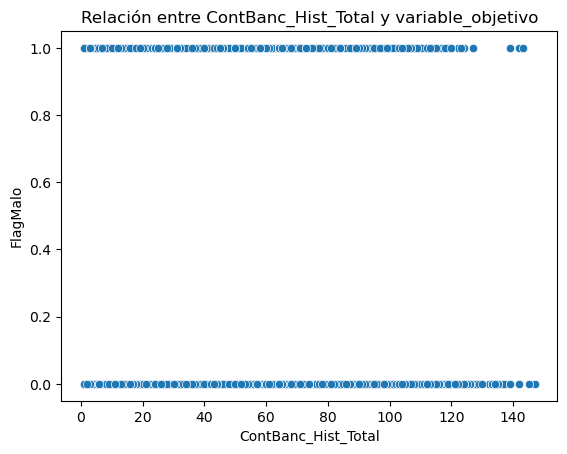

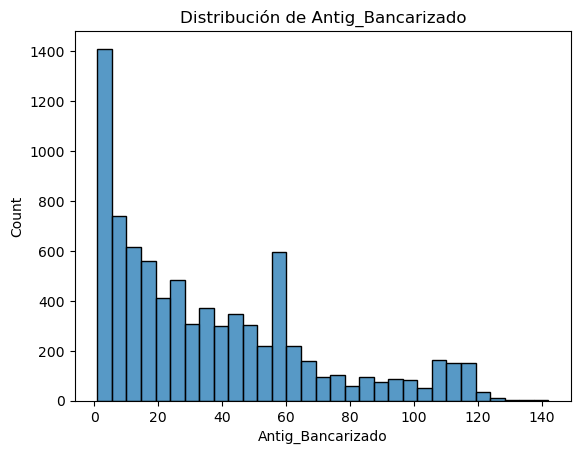

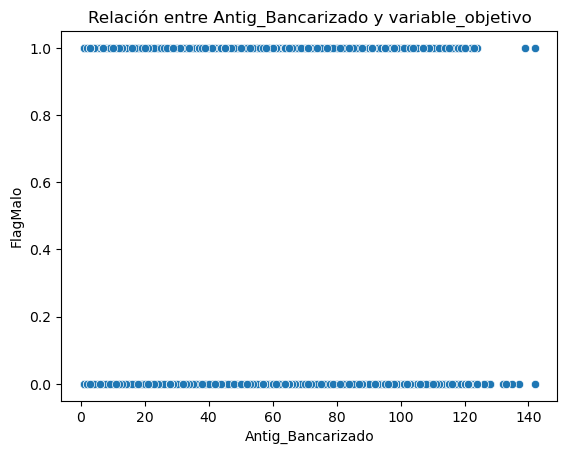

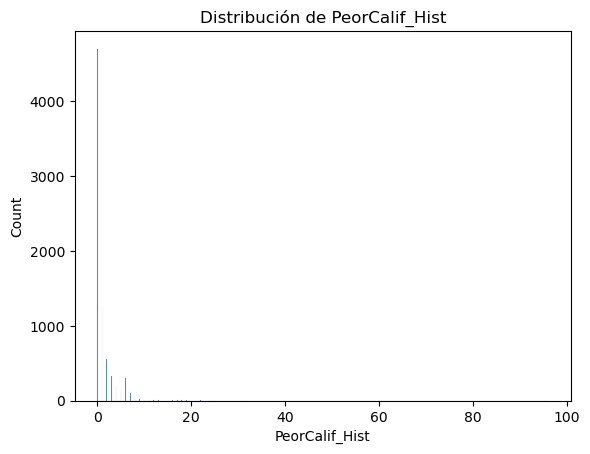

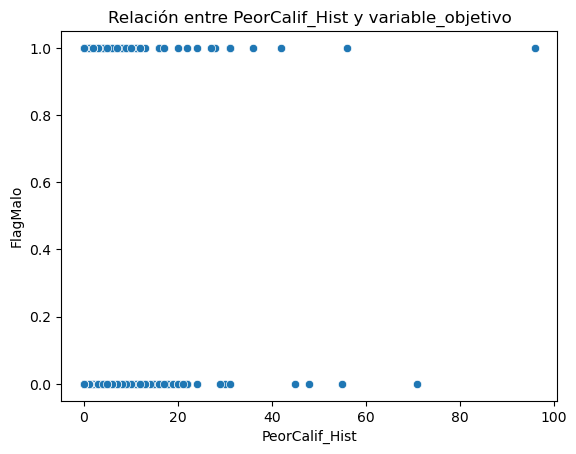

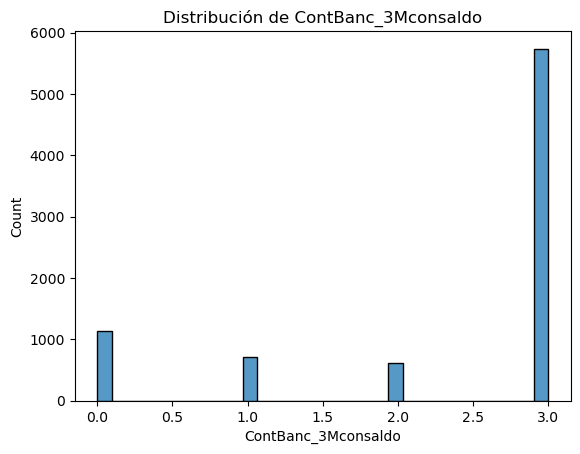

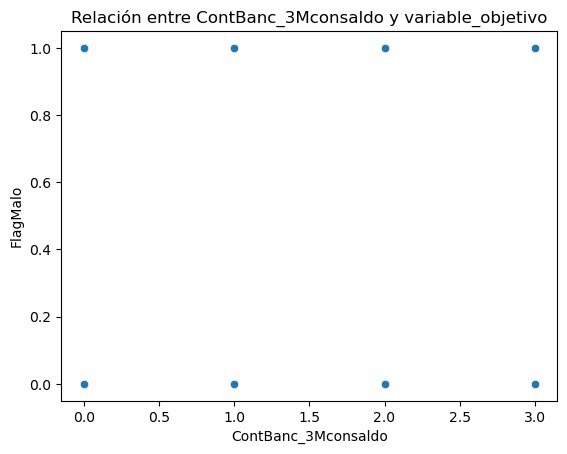

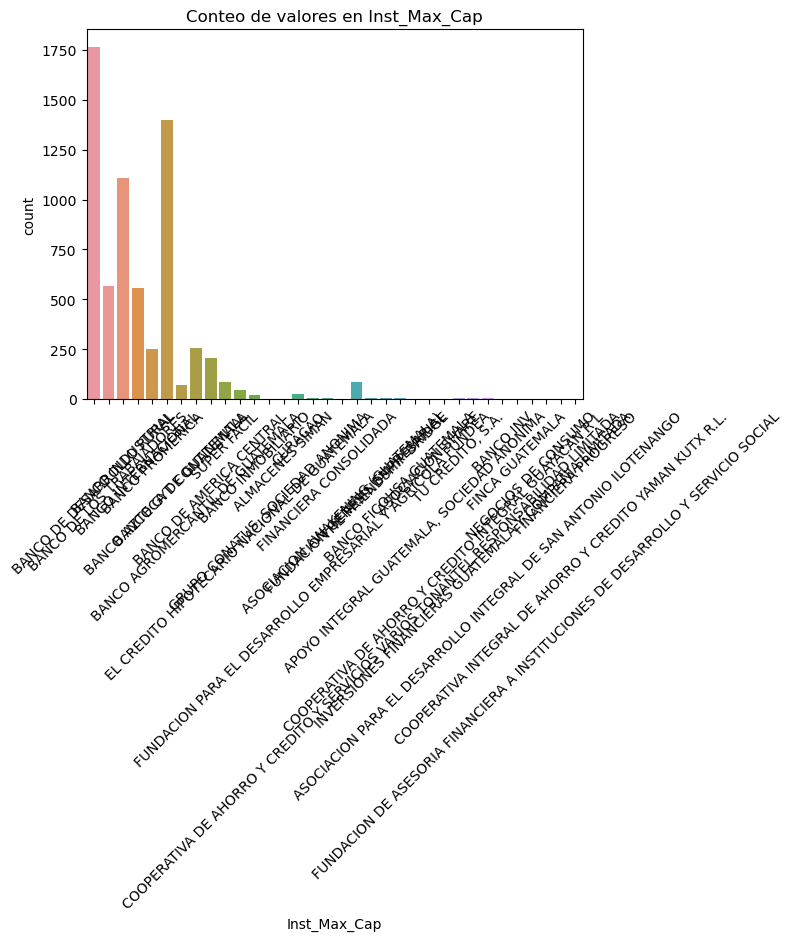

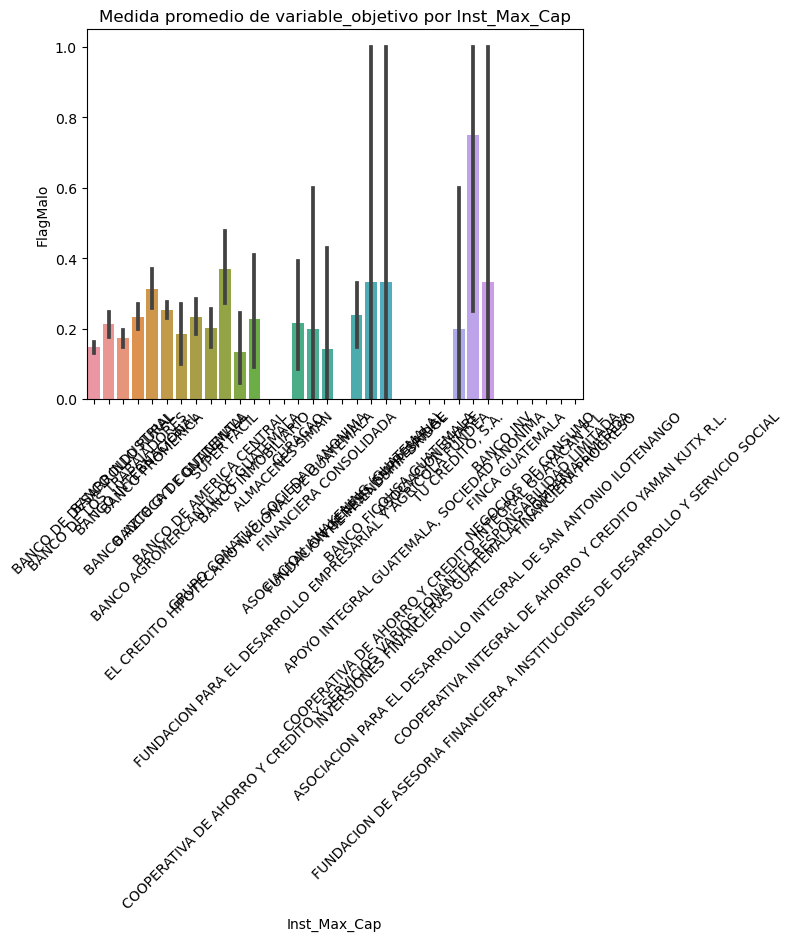

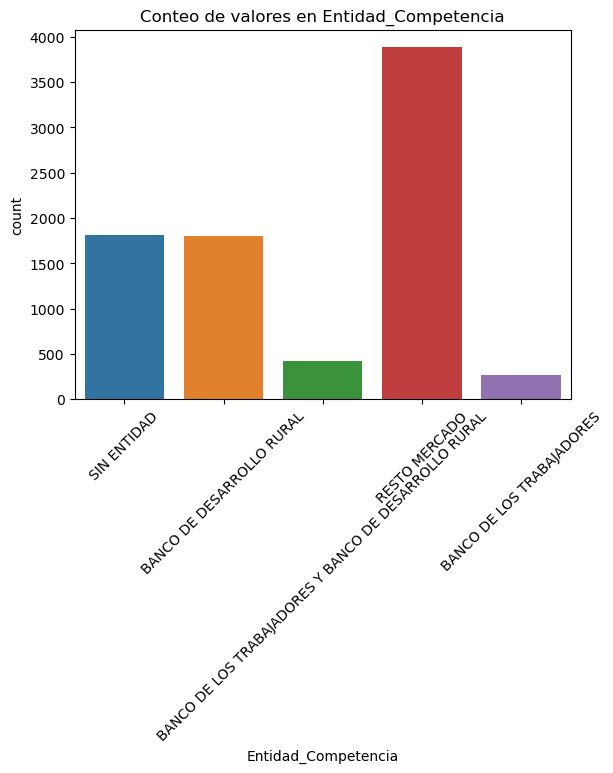

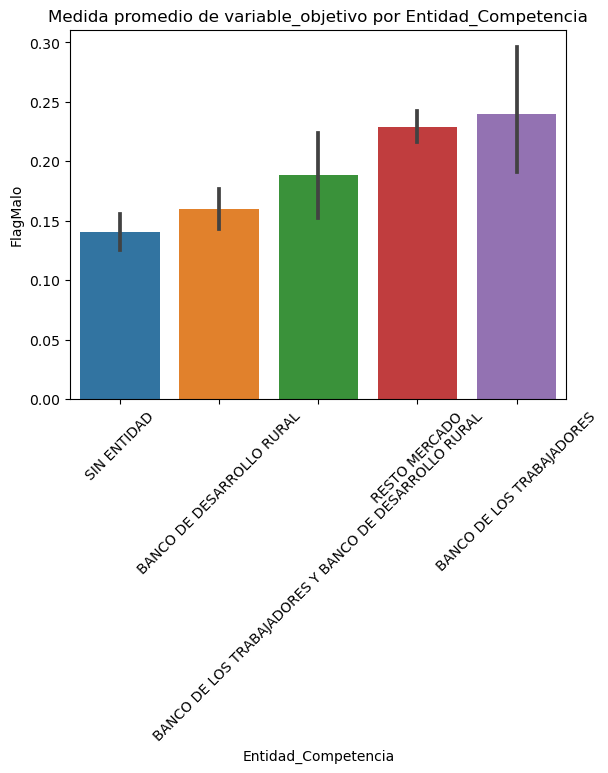

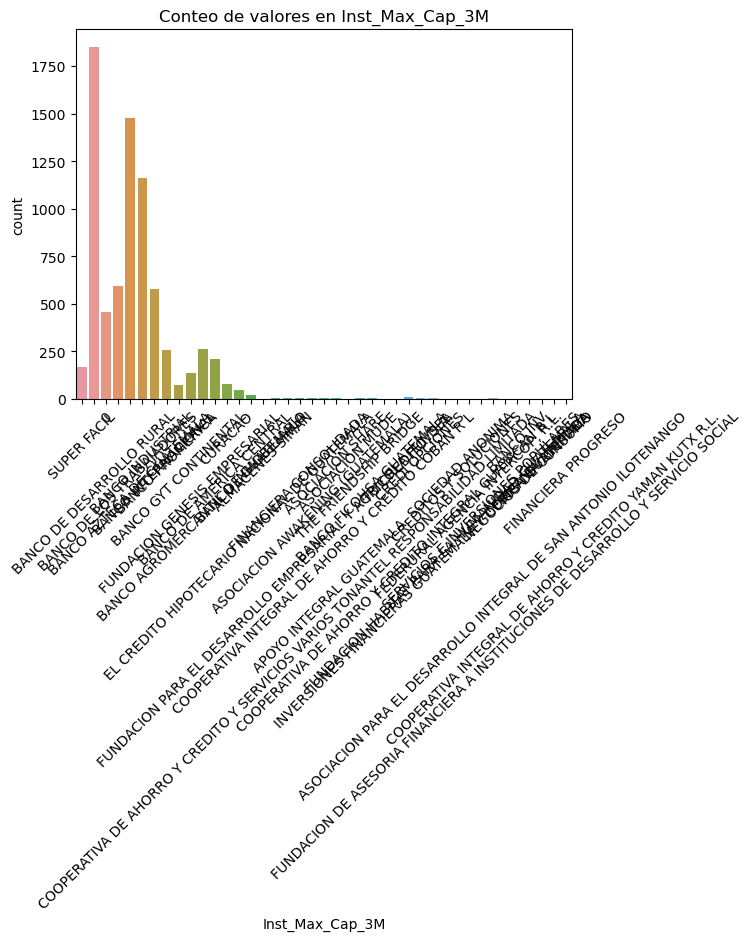

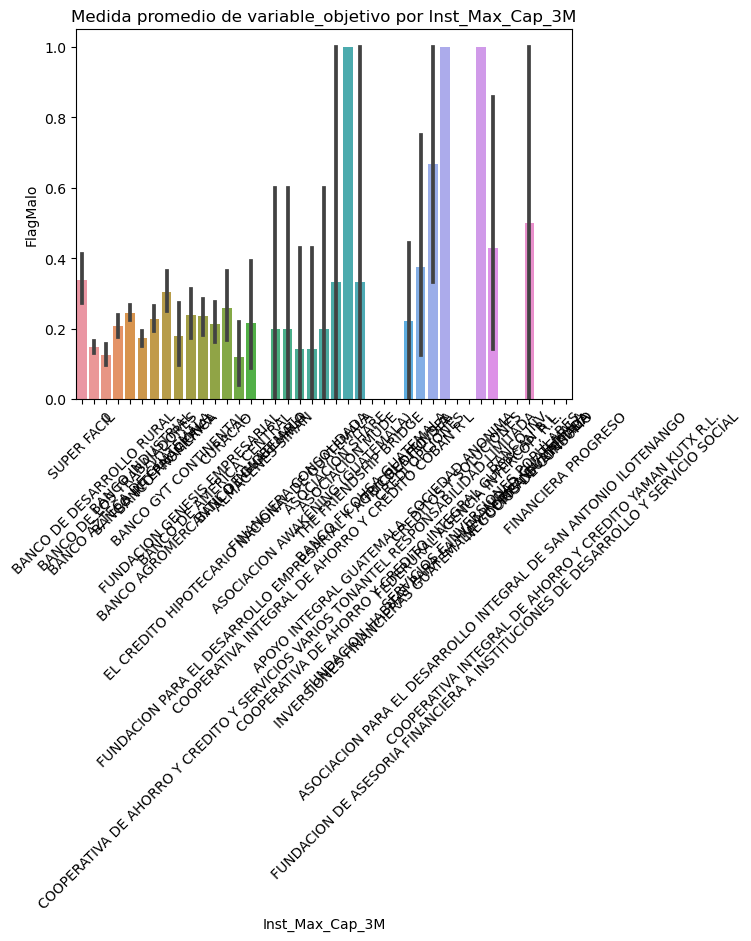

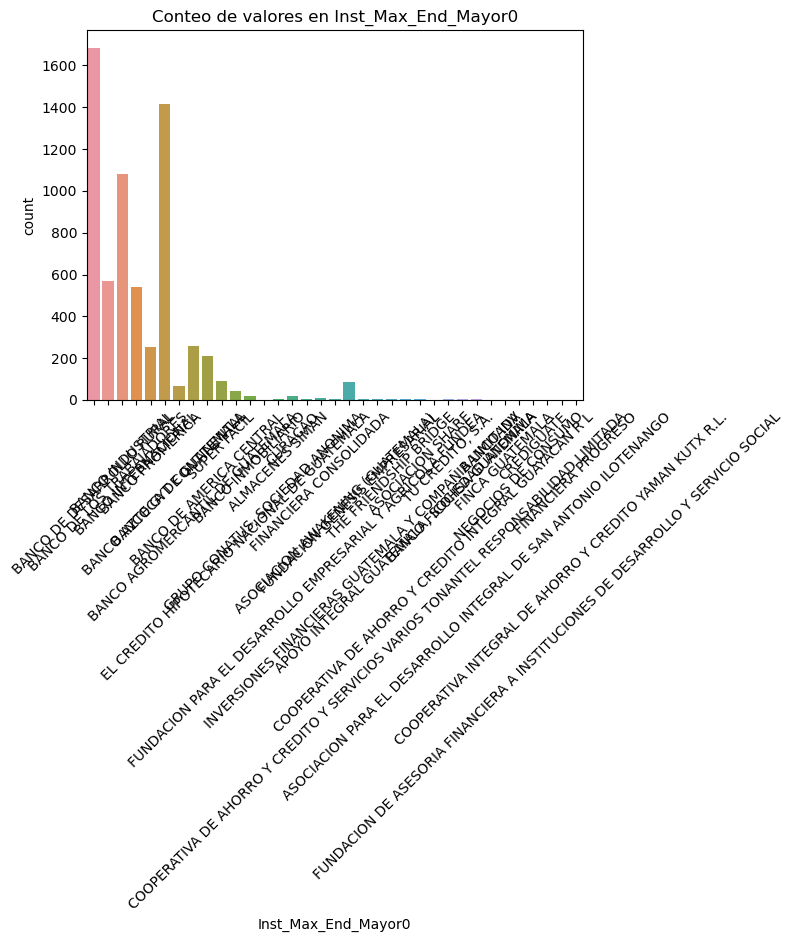

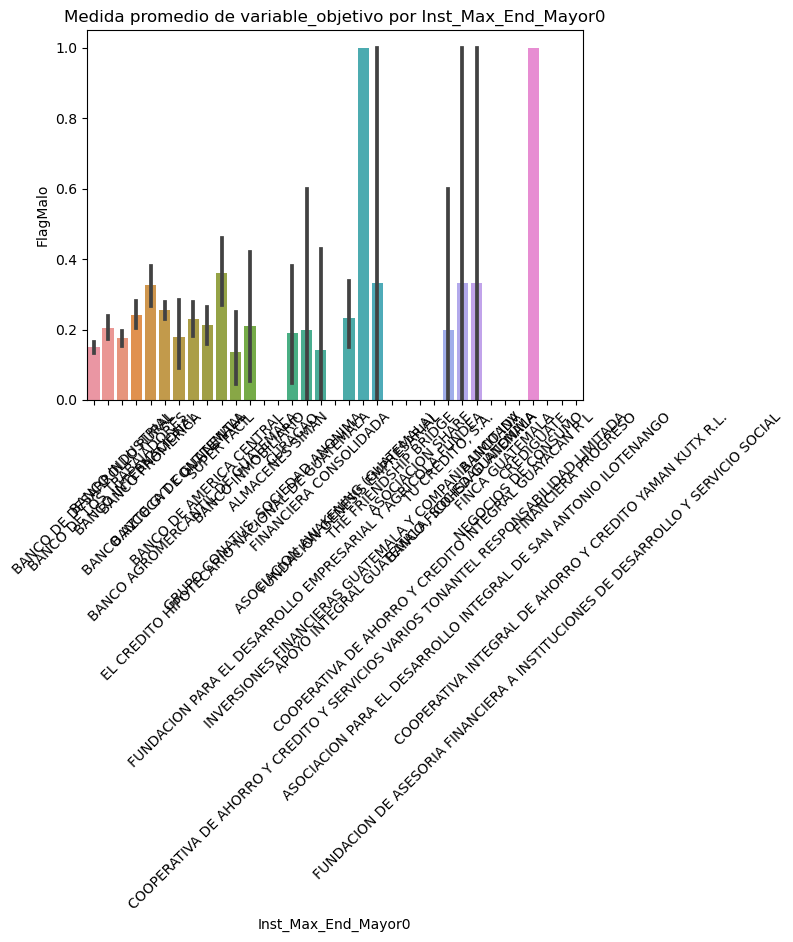

In [7]:


# Obtener información general del dataset
print(dataframe.info())

# Estadísticas descriptivas de todas las variables numéricas
print(dataframe.describe())

# Verificar valores nulos o faltantes
print(dataframe.isnull().sum())

# Exploración gráfica de todas las variables numéricas
numeric_columns = dataframe.select_dtypes(include=[np.number]).columns

for column in numeric_columns:
    # Gráfico de distribución
    sns.histplot(dataframe[column])
    plt.title(f'Distribución de {column}')
    plt.show()

    # Gráfico de dispersión en relación a una variable objetivo (si aplica)
    sns.scatterplot(x=column, y='FlagMalo', data=dataframe)
    plt.title(f'Relación entre {column} y variable_objetivo')
    plt.show()

 

# Exploración gráfica de todas las variables categóricas
categorical_columns = dataframe.select_dtypes(include=['object']).columns

for column in categorical_columns:

    # Gráfico de conteo

    sns.countplot(x=column, data=dataframe)
    plt.title(f'Conteo de valores en {column}')
    plt.xticks(rotation=45)
    plt.show()

    # Gráfico de barras en relación a una variable objetivo (si aplica)
    sns.barplot(x=column, y='FlagMalo', data=dataframe)
    plt.title(f'Medida promedio de variable_objetivo por {column}')
    plt.xticks(rotation=45)
    plt.show()

#### 3. Selección de variables

##### Variable a predecir 
FlagMalo: Variable que identifica a una persona prospecto como bueno o malo (0 - 1), a través de su comportamiento de mora en un margen de tiempo de seis meses.

##### Variables predictoras
Se seleccionaron 25 variables para predecir la Y, dentro de las cuales se encuentran de tipo númerico, decimal y string

#### 4. Ingeniería de características

In [8]:

# Identificar las variables numéricas con valores faltantes
num_vars_with_missing = [var for var in dataframe.columns if dataframe[var].isnull().sum() > 0 and dataframe[var].dtype != 'O']

# Imputar los valores faltantes con la media en todo el dataset
for var in num_vars_with_missing:

    dataframe[var] = dataframe[var].fillna(2)

In [9]:
col_nulos = [col for col in dataframe.columns if(dataframe[col].isnull().mean()>0)]
col_nulos

['Inst_Max_Cap', 'Inst_Max_Cap_3M', 'Inst_Max_End_Mayor0']

##### a. Imputación de variables con datos faltantes

In [10]:
# Identificar las variables numéricas con valores faltantes

string_vars_with_missing = [var for var in dataframe.columns if dataframe[var].isnull().sum() > 0 and dataframe[var].dtype == 'O']


# Imputar los valores faltantes con la media en todo el dataset

for var in string_vars_with_missing:

    dataframe[var] = dataframe[var].fillna('NO_TIENE')

In [11]:
col_nulos = [col for col in dataframe.columns if(dataframe[col].isnull().mean()>0)]
col_nulos

[]

##### b. Codificación de variables categóricas

In [12]:
def getDateColTypes(df):
    categoricas =[]

    for colName in df.columns:
        if(df[colName].dtype == 'O'):
            categoricas.append(colName)
    return categoricas

In [13]:
col_categoricas = getDateColTypes(dataframe)
col_categoricas

['Inst_Max_Cap',
 'Entidad_Competencia',
 'Inst_Max_Cap_3M',
 'Inst_Max_End_Mayor0']

In [15]:
for catCol in col_categoricas:
    if(catCol == 'Inst_Max_Cap','Entidad_Competencia','Inst_Max_Cap_3M','Inst_Max_End_Mayor0'):
        freq_encoder_dict=dataframe[catCol].value_counts().to_dict()
        dataframe[catCol]=dataframe[catCol].map(freq_encoder_dict)

##### d. Tratamiento de outliers

In [31]:
def getColumnasContinuas(dataset):
    continuas = []
    for col in dataset.columns:
        if((dataset[col].dtype=='int64') or (dataset[col].dtype == 'float64')):
            if(len(dataset[col].unique()) > 30):
                continuas.append(col)
    return continuas

In [32]:
col_continuas = getColumnasContinuas(dataframe)
col_continuas

['Id',
 'ContBanc_Hist',
 'MaxDeudaMora_U24M',
 'Sal_Acu_U24M',
 'MaxDeuda_U7_18M',
 'Prom_Saldo_U18M',
 'MaxDeuda_U4_18M',
 'SaldoMora_0M',
 'DeudaTotalMora_U12M',
 'MaxMontoTC_SinBDA',
 'SaldoCred_SinBDAeHip',
 'ContBanc_Hist_Total',
 'Antig_Bancarizado',
 'PeorCalif_Hist']

In [33]:
col_continuas.remove('Id')

In [34]:
def detectOutlierLimits(dataset, col):
    IQR = dataset[col].quantile(0.75) - dataset[col].quantile(0.25)
    LI = dataset[col].quantile(0.25) - (IQR*1.75)
    LS = dataset[col].quantile(0.75) + (IQR*1.75)

    return LI, LS

In [35]:
LI, LS = detectOutlierLimits(dataframe,col_continuas)
LI, LS

(ContBanc_Hist              -51.250000
 MaxDeudaMora_U24M            0.000000
 Sal_Acu_U24M           -595832.991875
 MaxDeuda_U7_18M         -38543.440000
 Prom_Saldo_U18M         -26827.793679
 MaxDeuda_U4_18M         -40766.803125
 SaldoMora_0M                 0.000000
 DeudaTotalMora_U12M          0.000000
 MaxMontoTC_SinBDA        -7000.000000
 SaldoCred_SinBDAeHip    -31709.090000
 ContBanc_Hist_Total        -41.750000
 Antig_Bancarizado          -72.250000
 PeorCalif_Hist              -3.500000
 dtype: float64,
 ContBanc_Hist           1.062500e+02
 MaxDeudaMora_U24M       0.000000e+00
 Sal_Acu_U24M            1.008150e+06
 MaxDeuda_U7_18M         6.462554e+04
 Prom_Saldo_U18M         5.050816e+04
 MaxDeuda_U4_18M         7.221586e+04
 SaldoMora_0M            0.000000e+00
 DeudaTotalMora_U12M     0.000000e+00
 MaxMontoTC_SinBDA       1.100000e+04
 SaldoCred_SinBDAeHip    4.982857e+04
 ContBanc_Hist_Total     1.247500e+02
 Antig_Bancarizado       1.392500e+02
 PeorCalif_Hist     

In [36]:
dataframe[col_continuas] = np.where(dataframe[col_continuas] > LS, LS, 
                                        np.where(dataframe[col_continuas] < LI, LI, dataframe[col_continuas]))

In [37]:
condicionNegativos = (dataframe[col_continuas] >= 0).all()
existen_negativos = not condicionNegativos.any()
existen_negativos

False

##### e. Balanceo de categorías  del target

In [38]:
dataframe['FlagMalo'].value_counts()

0    6617
1    1575
Name: FlagMalo, dtype: int64

In [39]:
df_bueno= dataframe[dataframe['FlagMalo']== 0]
df_bueno.shape

(6617, 28)

In [40]:
df_malo = dataframe[dataframe['FlagMalo']==1]
df_malo.shape

(1575, 28)

In [41]:
cantidadbuenos = 2*df_malo.shape[0]
cantidadbuenos

3150

In [42]:
df_bueno = df_bueno.sample(n=cantidadbuenos, random_state=2023)

In [43]:
df = pd.concat([df_bueno,df_malo])
df.shape

(4725, 28)

In [44]:
df.head()

Id FechaDesembolso  FlagMalo  RegionAgencia  NumInst_Total  \
6981  4085743      2022-10-31         0              3              1   
8087  3914313      2022-11-30         0              3              1   
4807  4046839      2022-07-31         0              3              1   
6782    87780      2022-09-30         0              3              0   
4498   116699      2022-07-31         0              1              1   

      NumOpe_Total  ContBanc_Hist  MaxDeudaMora_U24M  Sal_Acu_U24M  \
6981             1            4.0                0.0       2883.79   
8087             1           22.0                0.0     295970.87   
4807             1           33.0                0.0     451916.24   
6782             0           14.0                0.0      31457.65   
4498             1           60.0                0.0      50214.50   

      PeorCalif_U6M  ...  DeudaTotalMora_U12M  MaxMontoTC_SinBDA  \
6981            0.0  ...                  0.0             8000.0   
8087            0.0  ...                  0.0            11000.0   
4807            1.0  ...                  0.0             5760.0   
6782            0.0  ...                  0.0                0.0   
4498            0.0  ...                  0.0              100.0   

      SaldoCred_SinBDAeHip  ExclusivoTU  Inst_Max_Cap_3M  ContBanc_Hist_Total  \
6981                   0.0            0             1850                 4.00   
8087                   0.0            0              259                48.00   
4807                   0.0            0              264                33.00   
6782                   0.0            0              576                14.00   
4498                   0.0            0              259               124.75   

      Antig_Bancarizado  PeorCalif_Hist  Inst_Max_End_Mayor0  \
6981                3.0             0.0                 1684   
8087               48.0             3.0                  252   
4807               33.0             1.0                  260   
6782               12.0             0.0                 1804   
4498               92.0             4.0                 1804   

      ContBanc_3Mconsaldo  
6981                    3  
8087                    3  
4807                    3  
6782                    1  
4498                    0  

[5 rows x 28 columns]

In [45]:
from sklearn.metrics         import accuracy_score
from sklearn.metrics         import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler
from sklearn.linear_model    import Lasso
from sklearn.metrics         import mean_squared_error, r2_score
from sklearn.preprocessing   import MinMaxScaler, Binarizer

import seaborn as sns


##### f. División de data para entrenamiento y prueba

In [46]:
X = df.drop(['FlagMalo','Id','FechaDesembolso'], axis=1)
y = df['FlagMalo']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,shuffle=True,random_state=2023)

##### g. Estandarización de variables

In [48]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#### 5. Desarrollo de modelo de clasificación 

In [49]:
from sklearn.linear_model import LogisticRegression

Regresión logística

In [50]:
logit = LogisticRegression()
logit.fit(X_train_std,y_train)

logit_preds = logit.predict(X_test_std)
logit_preds

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [51]:
acc =round(accuracy_score(y_test,logit_preds),5)
roc_auc =round(roc_auc_score(y_test,logit_preds),5)

In [52]:
print(f"accuracy: {acc}") ###cantidad de aciertos (verdad pos + verdad neg / Total)
print(f"ROC-AUC: {roc_auc}") ###

accuracy: 0.68618
ROC-AUC: 0.57563


In [53]:
from sklearn.model_selection import GridSearchCV, KFold

logit = LogisticRegression(solver='saga')

hyperparams_grid={'penalty':['l1','l2','elasticnet',None],
                    'C':[0.01,0.1,1,10],
                    'fit_intercept':[True,False]

}

grid_search = GridSearchCV(estimator=logit,param_grid=hyperparams_grid,scoring=['roc_auc','accuracy'],refit='roc_auc',n_jobs=-1,
                                            cv=KFold(n_splits=10,shuffle=True,random_state=2023))

grid_search.fit(X_train_std,y_train)

accuracies = grid_search.cv_results_['mean_test_accuracy']
roc_aucs = grid_search.cv_results_['mean_test_roc_auc']

mean_acc =  np.mean([x for x in accuracies if not np.isnan(x)])
mean_roc_aucs = np.mean([x for x in roc_aucs if not np.isnan(x)])

print(f'Mejores hiperparametros:{grid_search.best_params_}')
print(f'Mejor Métrica:{grid_search.best_score_}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_aucs}')


Mejores hiperparametros:{'C': 0.1, 'fit_intercept': True, 'penalty': 'l1'}
Mejor Métrica:0.7023131357719359
Mean Accuracy: 0.6544125354756019
Mean ROC_AUC: 0.6989910643192436


c:\Users\PC2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PC2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PC2\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1471, in fit
    raise ValueError(
ValueError: l1_ratio must be between 0 and 1; got (l1_ratio=None)

--------------------------------------------------------------------------------
80 fits failed with the following error

Matriz de confusión: RL

In [54]:
import pandas as pd

# Obtener las predicciones en el conjunto de prueba
y_pred = grid_search.predict(X_test_std)

# Calcular la matriz de confusión como un DataFrame
confusion_mtx = pd.crosstab(index=y_test, columns=y_pred, rownames=['Observación'], colnames=['Predicción'])

print("Matriz de confusión:")
print(confusion_mtx)


Matriz de confusión:
Predicción     0    1
Observación          
0            870   88
1            356  104


Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
random_forest = RandomForestClassifier()

hyperparams_grid = {'n_estimators':[1000],
                    'criterion':['gini','entropy','log_loss']

}

grid_search = GridSearchCV(estimator=random_forest,param_grid=hyperparams_grid,scoring=['roc_auc','accuracy'],refit='roc_auc',n_jobs=-1,
                                            cv=KFold(n_splits=10,shuffle=True,random_state=2023))

grid_search.fit(X_train_std,y_train)

accuracies = grid_search.cv_results_['mean_test_accuracy']
roc_aucs = grid_search.cv_results_['mean_test_roc_auc']

mean_acc =  np.mean([x for x in accuracies if not np.isnan(x)])
mean_roc_aucs = np.mean([x for x in roc_aucs if not np.isnan(x)])

print(f'Mejores hiperparametros:{grid_search.best_params_}')
print(f'Mejor Métrica:{grid_search.best_score_}')
print(f'Mean Accuracy: {mean_acc}')
print(f'Mean ROC_AUC: {mean_roc_aucs}')

c:\Users\PC2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\PC2\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\PC2\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "c:\Users\PC2\anaconda3\lib\site-packages\joblib\parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "c:\Users\PC2\anaconda3\lib\site-packages\joblib\paral

Mejores hiperparametros:{'criterion': 'entropy', 'n_estimators': 1000}
Mejor Métrica:0.6990922725999247
Mean Accuracy: 0.6977785406939486
Mean ROC_AUC: 0.6987294731405096


Matriz de confusión: RF

In [57]:
import pandas as pd
from sklearn.metrics import confusion_matrix

# Obtener las predicciones en el conjunto de prueba
y_pred = grid_search.predict(X_test_std)

# Calcular la matriz de confusión como un DataFrame
confusion_mtx = pd.crosstab(index=y_test, columns=y_pred, rownames=['Observación'], colnames=['Predicción'])

print("Matriz de confusión:")
print(confusion_mtx)

Matriz de confusión:
Predicción     0    1
Observación          
0            843  115
1            301  159


Naive Bayes

In [58]:
from sklearn.naive_bayes  import GaussianNB

clf_Nb = GaussianNB()
clf_Nb

GaussianNB()

In [59]:
clf_Nb.fit(X_train_std, y_train)

GaussianNB()

In [60]:
y_preds_nb = clf_Nb.predict(X_test_std)
y_preds_nb

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [61]:
print("Accuracy:", accuracy_score(y_test, y_preds_nb))

Accuracy: 0.6332863187588152


Matriz de confusión: NB

In [62]:
print("Matriz de confusión:\n\n",pd.crosstab(y_test, y_preds_nb, rownames=["Observación"], colnames=["Predicción"]))

Matriz de confusión:

 Predicción     0    1
Observación          
0            729  229
1            291  169


In [63]:

confusion_matrix = pd.crosstab(y_test, y_preds_nb, rownames=["Observación"], colnames=["Predicción"])
# Calcular la precisión
accuracy = (confusion_matrix.values.diagonal().sum()) / confusion_matrix.values.sum()

# Calcular la especificidad
true_negatives = confusion_matrix.values[0, 0]
false_positives = confusion_matrix.values[0, 1]
specificity = true_negatives / (true_negatives + false_positives)

# Calcular la sensibilidad
true_positives = confusion_matrix.values[1, 1]
false_negatives = confusion_matrix.values[1, 0]
sensitivity = true_positives / (true_positives + false_negatives)

# Imprimir los resultados
print("Precisión (Accuracy):", accuracy)
print("Especificidad (Specificity):", specificity)
print("Sensibilidad (Sensitivity):", sensitivity)

Precisión (Accuracy): 0.6332863187588152
Especificidad (Specificity): 0.7609603340292276
Sensibilidad (Sensitivity): 0.3673913043478261
